In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Load the dataset and print the head
data_path = 'dataset/kc_house_data.csv'
house_df = pd.read_csv(data_path)
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000


In [3]:
# Print the shape of dataset
house_df.shape

(21614, 21)

In [4]:
# Count of the data
house_df.count()

id               21614
date             21614
price            21614
bedrooms         21614
bathrooms        21614
sqft_living      21614
sqft_lot         21614
floors           21614
waterfront       21614
view             21614
condition        21614
grade            21614
sqft_above       21614
sqft_basement    21614
yr_built         21614
yr_renovated     21614
zipcode          21614
lat              21614
long             21614
sqft_living15    21614
sqft_lot15       21614
dtype: int64

In [5]:
# Describe the dataset
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161400e+04,2.161400e+04,21614.000000,21614.000000,21614.000000,2.161400e+04,21614.000000,21614.000000,21614.000000,21614.000000,21614.000000,21614.000000,21614.000000,21614.000000,21614.000000,21614.000000,21614.000000,21614.000000,21614.000000,21614.000000
mean,4.580205e+09,5.400911e+05,3.370871,2.114798,2079.894189,1.510650e+04,1.494286,0.007541,0.234293,3.409503,7.656843,1788.356528,291.537661,1971.004858,84.398353,98077.942491,47.560051,-122.213905,1986.523503,12768.096234
std,2.876534e+09,3.671190e+05,0.930050,0.770169,918.420011,4.141961e+04,0.539987,0.086515,0.766301,0.650818,1.175440,828.087051,442.584799,29.372760,401.670358,53.505246,0.138561,0.140830,685.388698,27303.599094
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219625e+05,3.000000,1.750000,1427.750000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471025,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230500,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
# Column data types
house_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
# Getting the registeration year from the date
house_df['reg_year'] = house_df['date'].str[:4]
print(house_df['reg_year'])

0        2014
1        2014
2        2015
3        2014
4        2014
         ... 
21609    2014
21610    2015
21611    2014
21612    2015
21613    2014
Name: reg_year, Length: 21614, dtype: object


In [8]:
# Convert reg_year to integer
house_df['reg_year'] = house_df['reg_year'].astype('int')

In [9]:
house_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
reg_year           int64
dtype: object

In [10]:
# Create a new column called house_age
house_df['house_age'] = np.nan

In [11]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,reg_year,house_age
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,NaN
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,NaN
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,NaN
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,NaN
4,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,NaN


In [12]:
# Loop through the renovation column and find the age
for i, j in enumerate(house_df['yr_renovated']):
    if (j==0):
        house_df['house_age'][i] = house_df['reg_year'][i] - house_df['yr_built'][i]
    else:
        house_df['house_age'][i] = house_df['reg_year'][i] - house_df['yr_renovated'][i]

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [13]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,reg_year,house_age
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,23.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49.0
4,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49.0


In [14]:
# Remove the date values other than age
house_df.drop(['date', 'yr_built', 'yr_renovated', 'reg_year'], axis=1, inplace=True)
house_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,59.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,23.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,82.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,49.0
4,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,49.0


In [15]:
# Remove other irrelvent columns
house_df.drop(['id', 'zipcode', 'lat', 'long'], axis=1, inplace=True)
house_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,59.0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,23.0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82.0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,49.0
4,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,49.0


In [16]:
# Remove columns with house age as -1
house_df = house_df[house_df['house_age'] != -1]
house_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,59.0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,23.0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82.0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,49.0
4,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,49.0


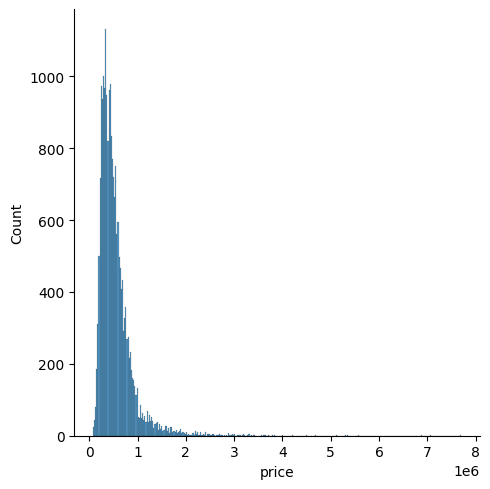

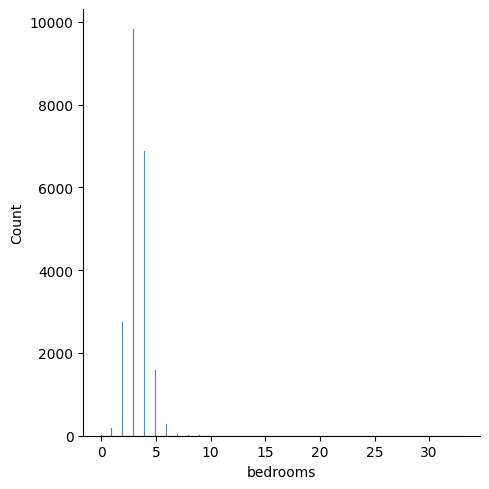

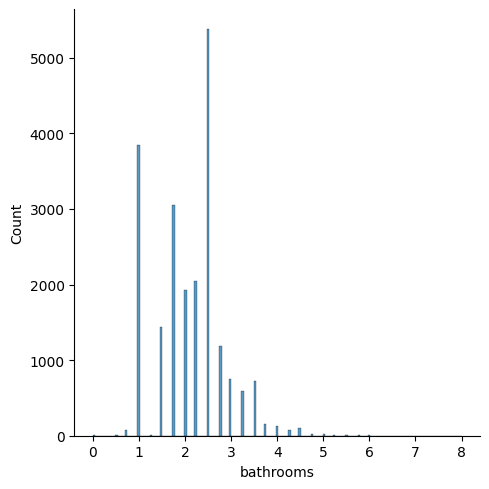

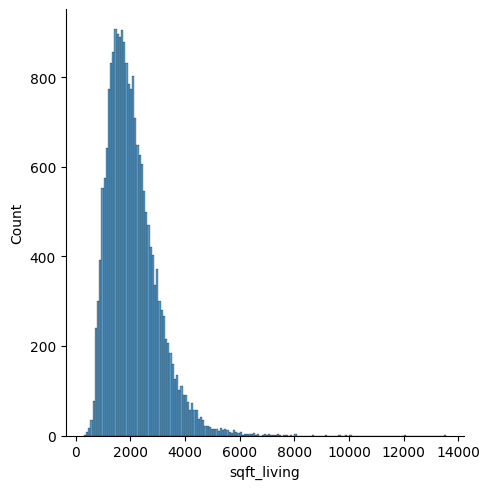

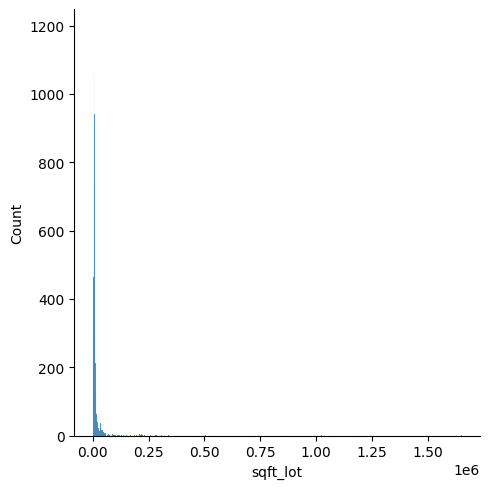

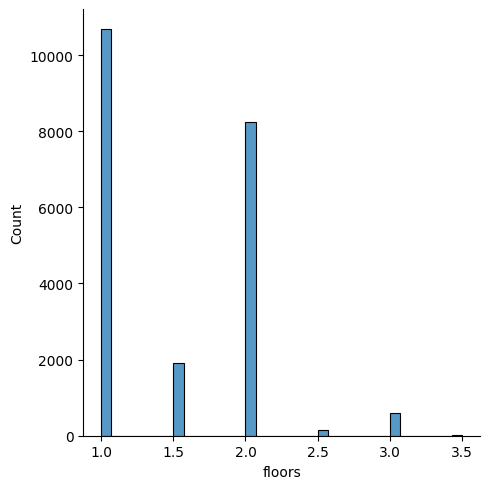

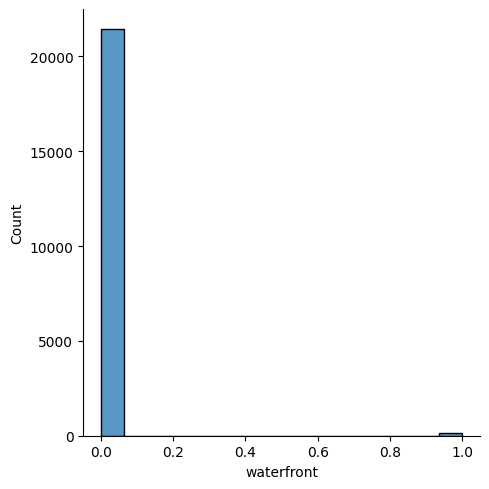

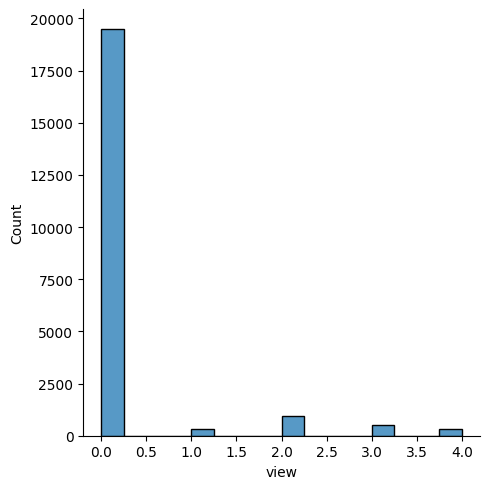

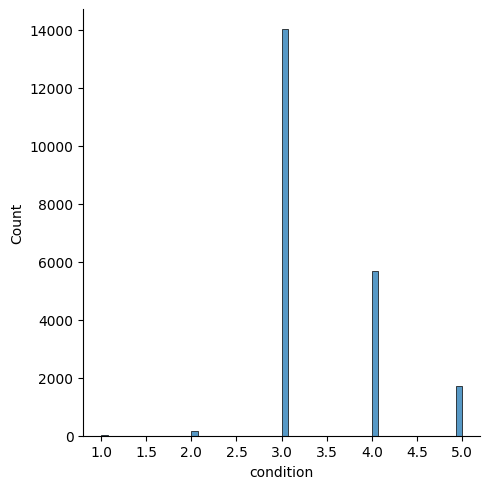

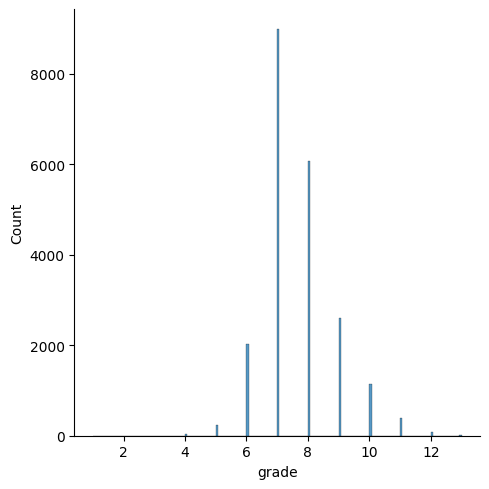

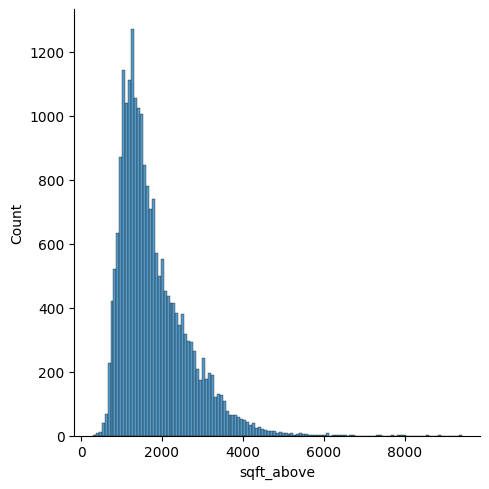

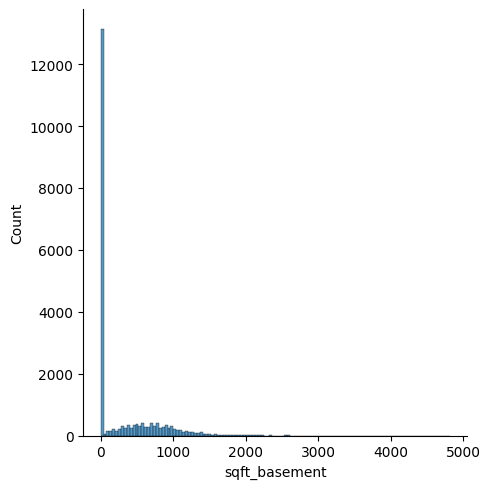

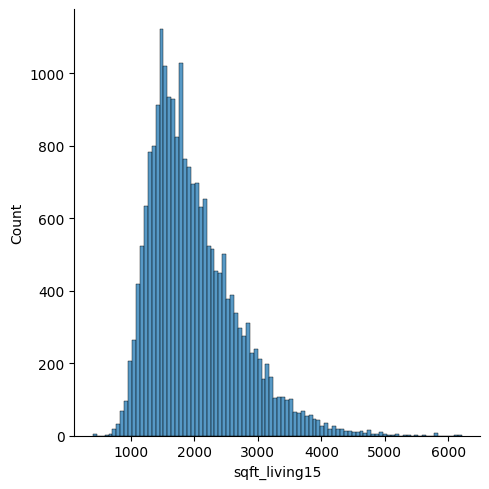

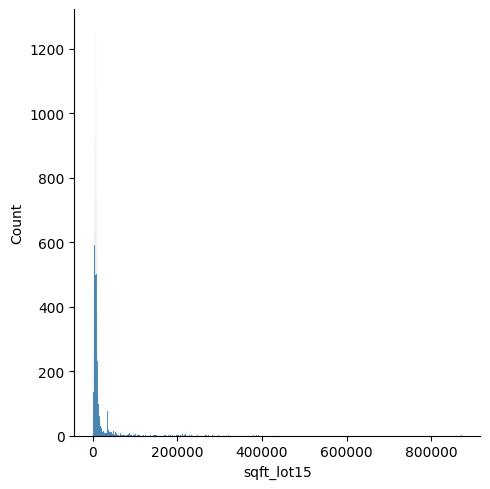

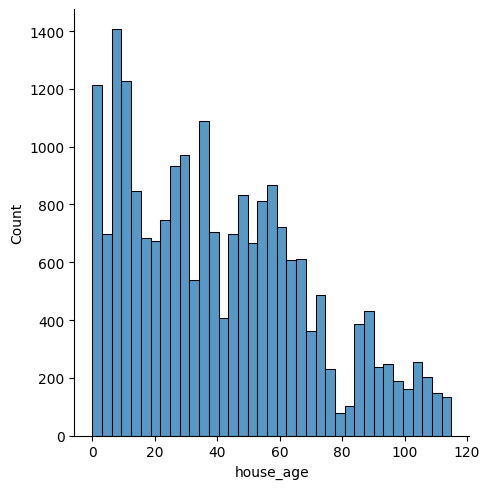

In [18]:
# Distribution plot for all columns
for i in house_df.columns:
    sns.displot(house_df[i])
    plt.show()

<Figure size 640x480 with 0 Axes>

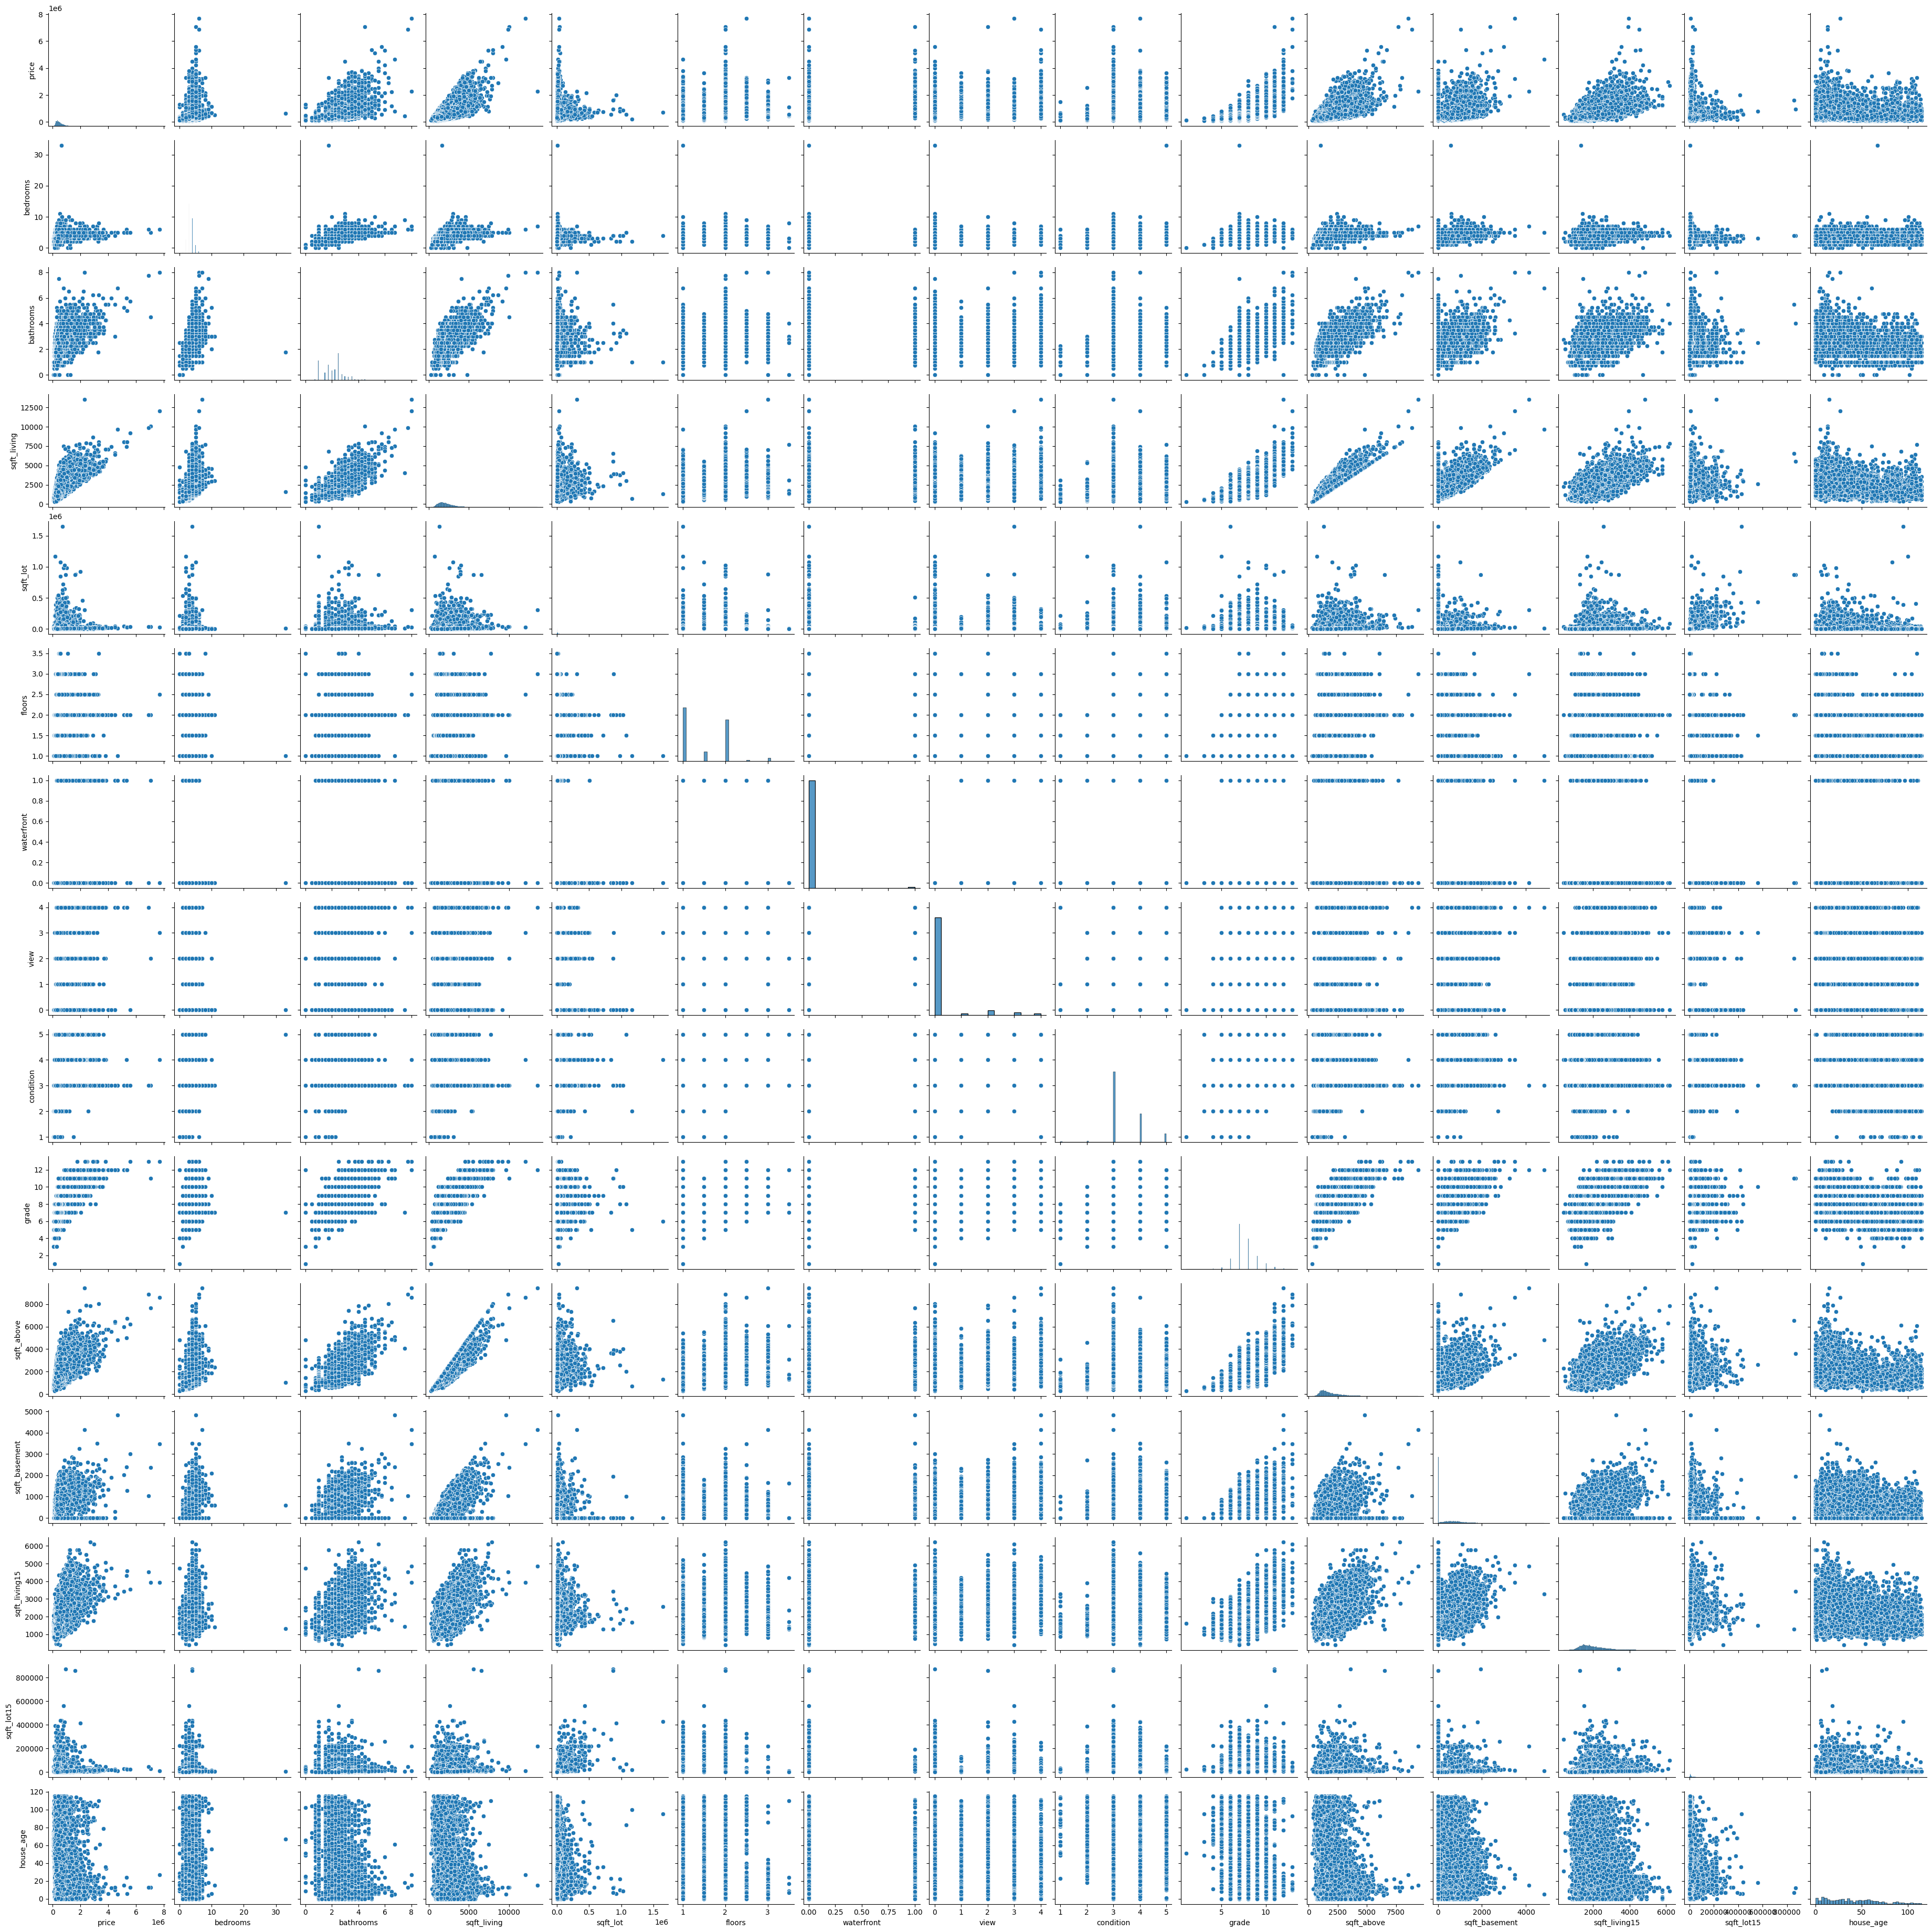

In [19]:
# pairplot
plt.figure()
sns.pairplot(house_df)
plt.show()

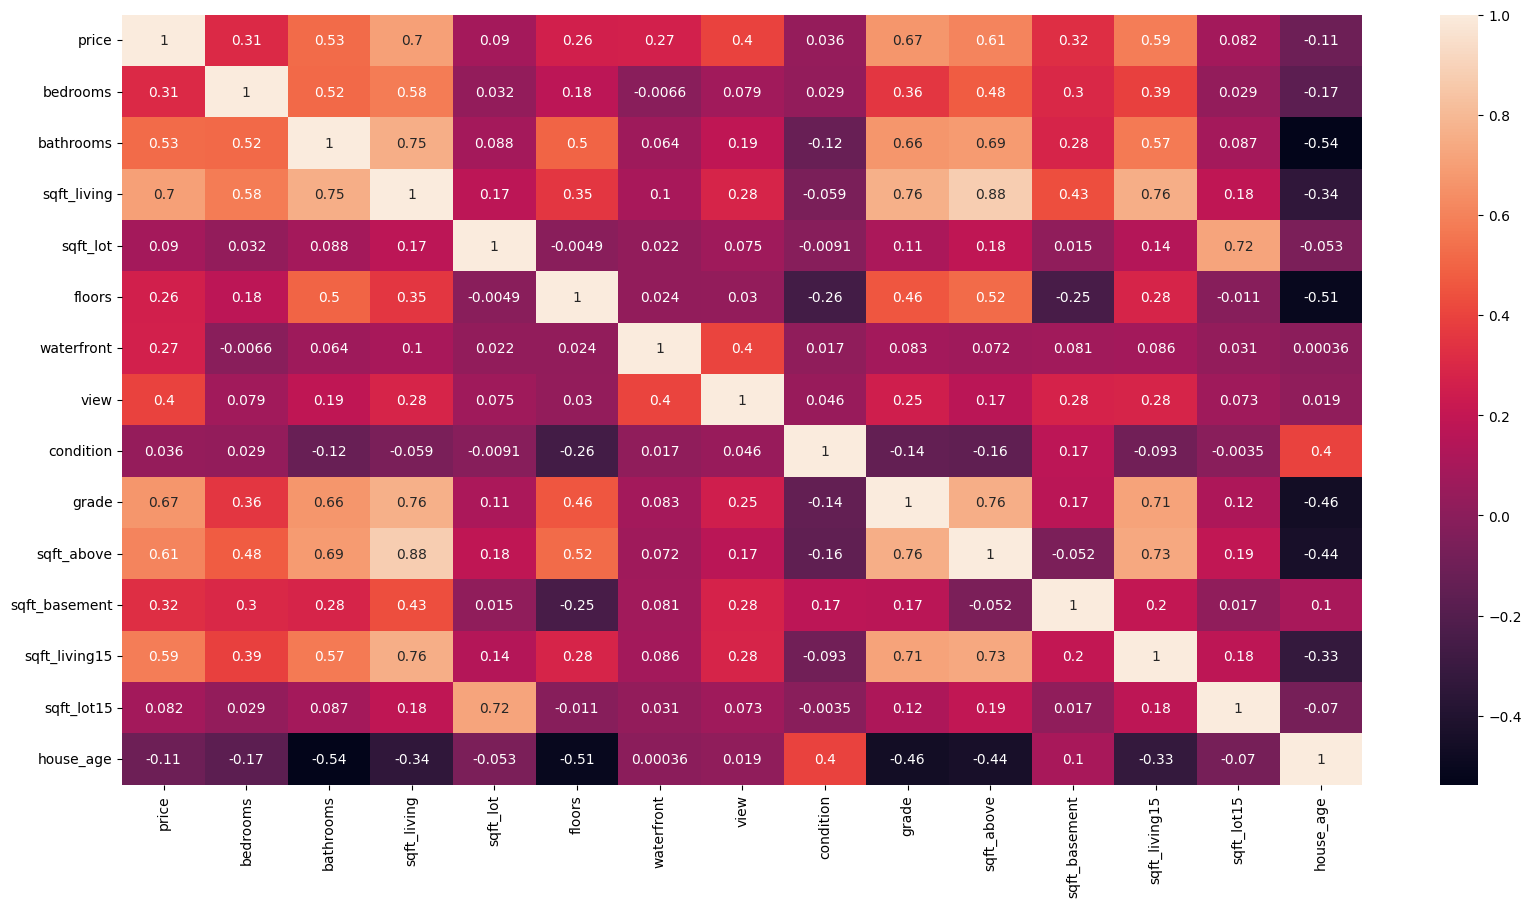

In [22]:
# Plotting a heat map
plt.figure(figsize=(20,10))
sns.heatmap(house_df.corr(), annot=True)
plt.show()

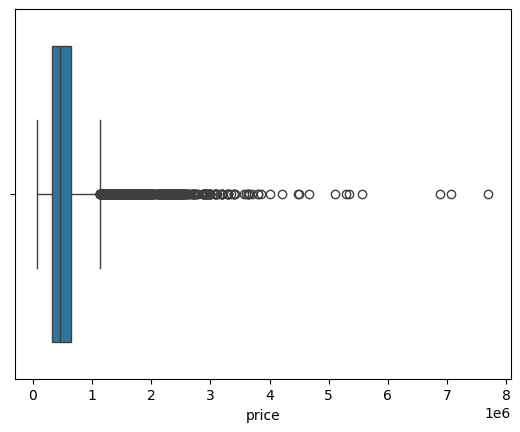

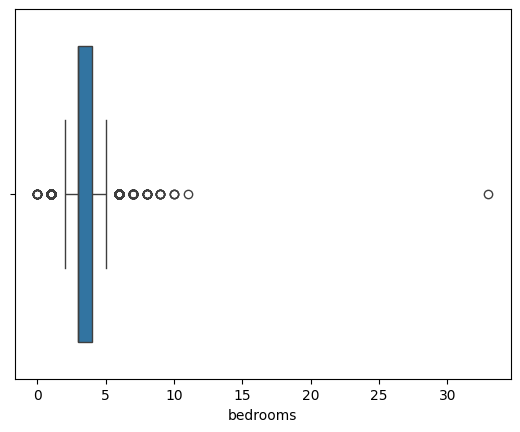

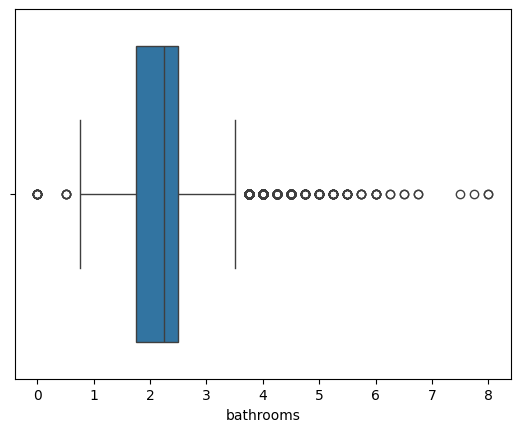

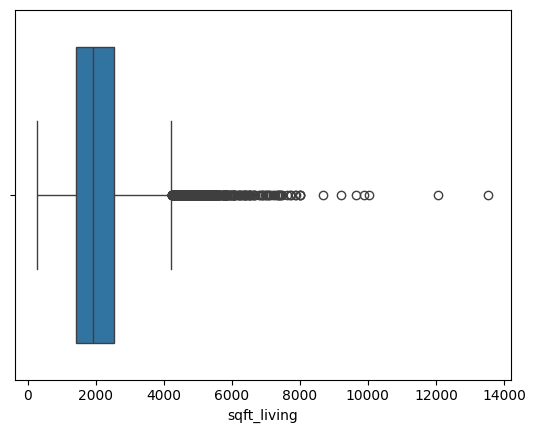

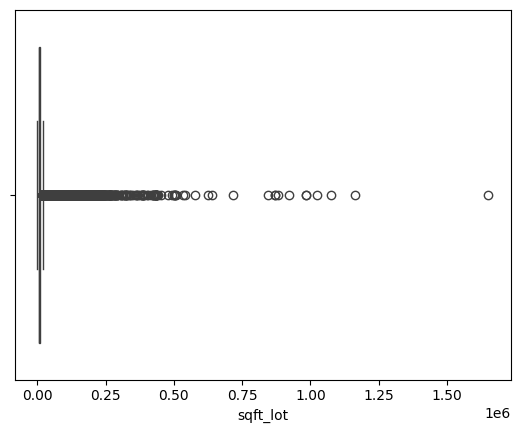

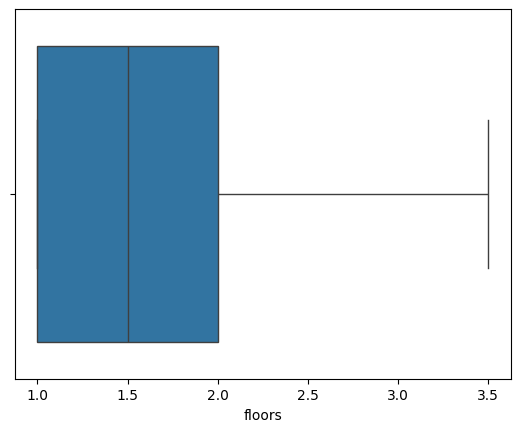

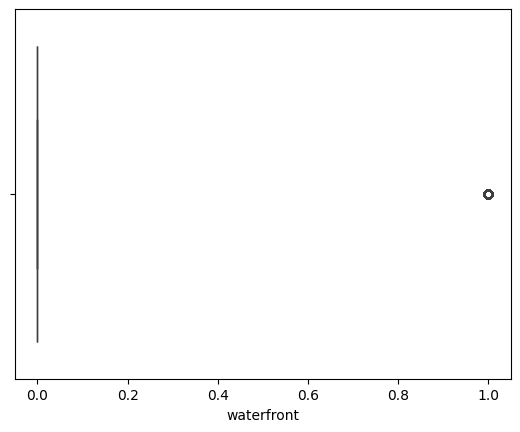

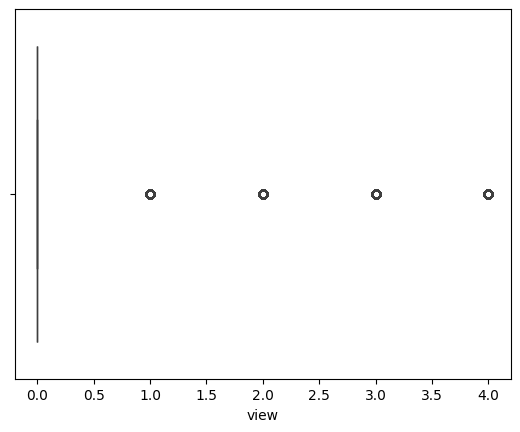

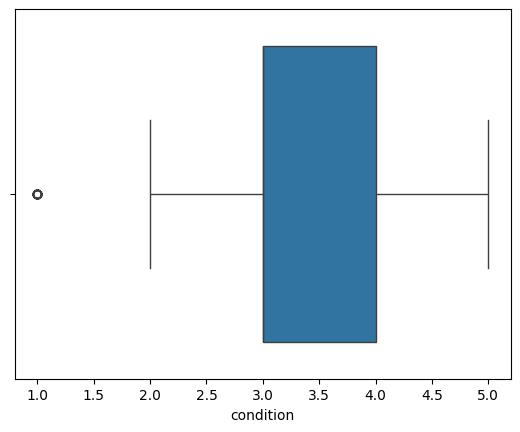

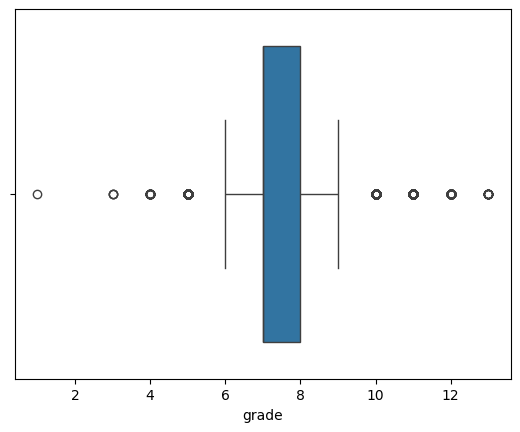

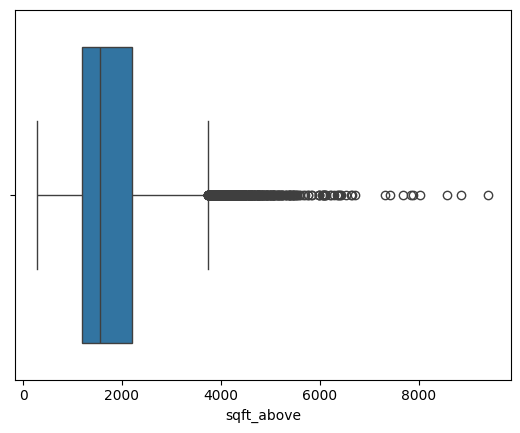

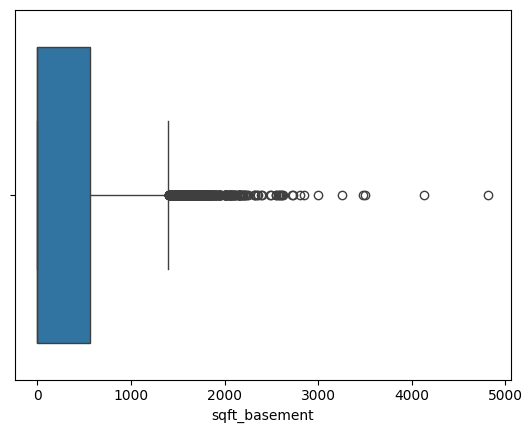

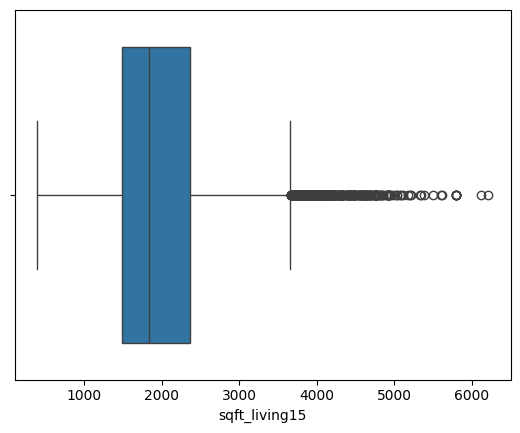

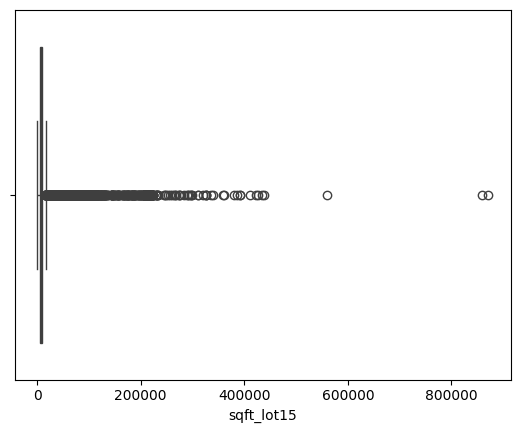

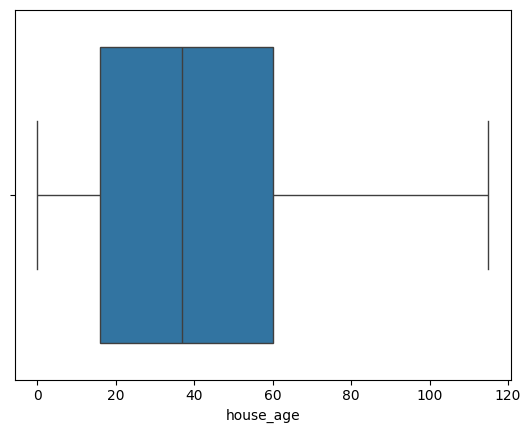

In [25]:
# Box plot for all column
for i in house_df.columns:
    sns.boxplot(x=house_df[i])
    plt.show()

In [33]:
# Split the dataframe into input x and output y
X = house_df.drop('price', axis=1)
y = house_df['price']

X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,59.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,23.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,49.0
4,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,49.0


In [34]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    604000.0
Name: price, dtype: float64

In [46]:
# Define the model
model = keras.Sequential()
model.add(layers.Dense(14, activation='relu'))
model.add(layers.Dense(14, activation='relu'))
model.add(layers.Dense(14, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1))

In [54]:
# Compile and fit the model
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
history = model.fit(X, y, validation_split=0.33, batch_size=32, epochs=50)

Epoch 1/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step - loss: 66458411008.0000 - mae: 163275.8594 - mse: 66458411008.0000 - val_loss: 66784428032.0000 - val_mae: 173447.9219 - val_mse: 66784428032.0000
Epoch 2/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 66469867520.0000 - mae: 163276.2812 - mse: 66469867520.0000 - val_loss: 68490141696.0000 - val_mae: 174826.8750 - val_mse: 68490141696.0000
Epoch 3/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - loss: 66349330432.0000 - mae: 163434.8906 - mse: 66349330432.0000 - val_loss: 66498121728.0000 - val_mae: 169931.3125 - val_mse: 66498121728.0000
Epoch 4/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - loss: 66333278208.0000 - mae: 162479.6406 - mse: 66333278208.0000 - val_loss: 67741548544.0000 - val_mae: 177819.9688 - val_mse: 67741548544.0000
Epoch 5/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 66120724480.0000 - mae: 163147.2812 - mse: 66120724480.0000 - val_loss: 66434416640.0000 - val_mae: 170254.4688 - val_mse: 6643441

In [55]:
# Model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 14)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 14)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 14)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4)              │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,087 (8.16 KB)

 Trainable params: 695 (2.71 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,392 (5.44 KB)

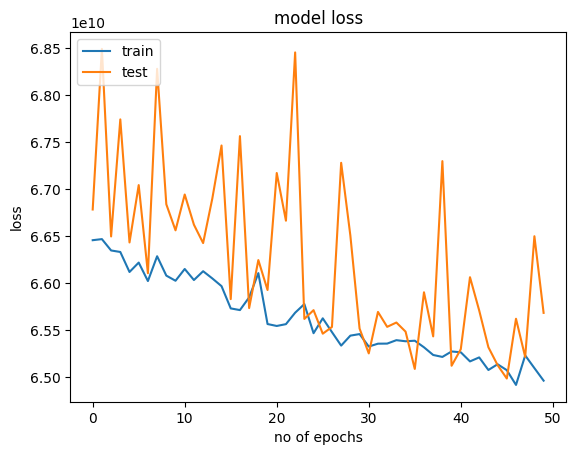

In [56]:
# Plot history graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [58]:
# Predicting the number house price for a single house
import numpy
from numpy import array

# The input data for getting the price
Xnew = numpy.array([[2,3,1280,5550,1,0,0,4,7,2280,0,1440,5750,60]])
# Convert the values in the array to float
Xnew = numpy.array(Xnew, dtype=numpy.float64)

# Making the prediction
Ynew = model.predict(Xnew)

# Print the prediction
print(Ynew[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[463386.94]
